# Imports

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
kl_data_cleaned = pd.read_csv('kl_property_cleaned.csv', index_col=[0])

In [3]:
kl_data_cleaned.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Property Type Supergroup,Price per Size
0,klcc,1250000,3.0,3.0,2.0,Serviced Residence,1335.0,Fully Furnished,Serviced Residence,936.329588
1,damansara heights,6800000,6.0,7.0,NaN,Bungalow,6900.0,Partly Furnished,Bungalow,985.507246
2,dutamas,1030000,3.0,4.0,2.0,Condominium (Corner),1875.0,Partly Furnished,Condominium,549.333333
4,bukit jalil,900000,5.0,3.0,2.0,Condominium (Corner),1513.0,Partly Furnished,Condominium,594.844679
5,taman tun dr ismail,5350000,6.0,5.0,4.0,Bungalow,7200.0,Partly Furnished,Bungalow,743.055556


# Data Exploration

We will compare the neighborhoods based on a few features and see how they differ from each other.

A plotting function that plots a horizontal bar graph.

In [4]:
def feature_by_neighborhood(feature, formatting, factor):
    
    # preparing the data frame for plotting
    df = kl_data_cleaned.groupby('Location')[feature].median().sort_values(ascending=False).reset_index()
    
    fig = sns.catplot(
        x = feature,
        y = 'Location',
        data = df,
        kind = 'bar',
        height = 10,
        aspect = 0.8,
        color = 'lightsteelblue'
    )
    
    for index, data in df.iterrows():
        fig.ax.text(x = data[feature] + (0.1 * (df[feature].max()-df[feature].min())), 
                    y = data.name, 
                    s = formatting.format(data[feature]/factor),
                    ha ='center', 
                    va ='center')
    
    # remove left and bottom spines from plot
    fig.despine(left = True, bottom = True)
    # remove ticks
    fig.ax.tick_params(left = False, bottom = False)
    # removing x axis
    fig.ax.get_xaxis().set_visible(False)
    # removing y axis label
    fig.set_ylabels("")

### Neighborhoods and their Total Price

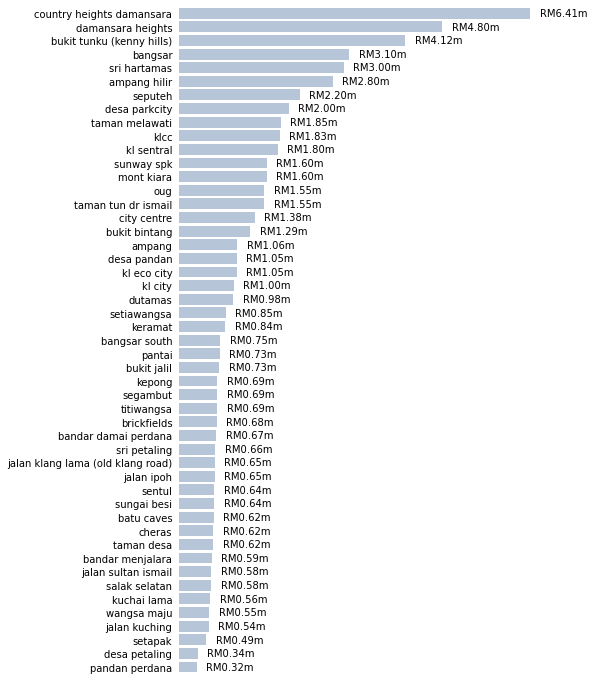

In [5]:
feature_by_neighborhood(feature = 'Price', formatting = "RM{:.2f}m", factor = 1000000)

### Neighborhoods and their Price per Square Foot

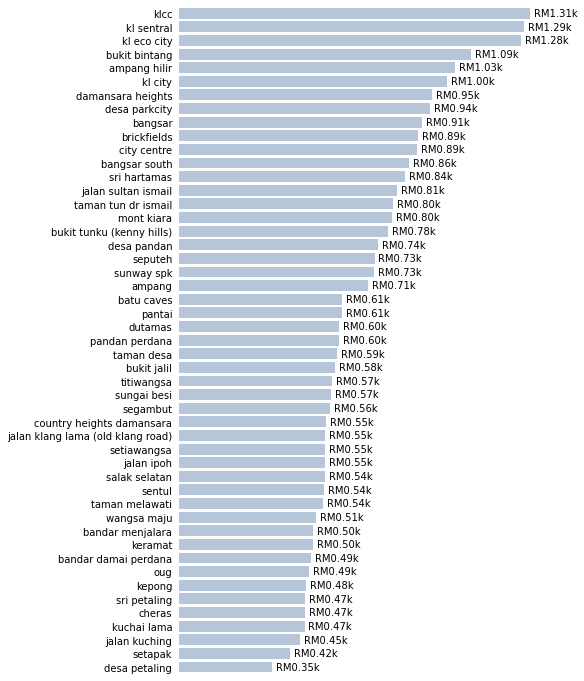

In [6]:
feature_by_neighborhood(feature = 'Price per Size', formatting = "RM{:.2f}k", factor = 1000)

### Neighborhoods and their Property Size

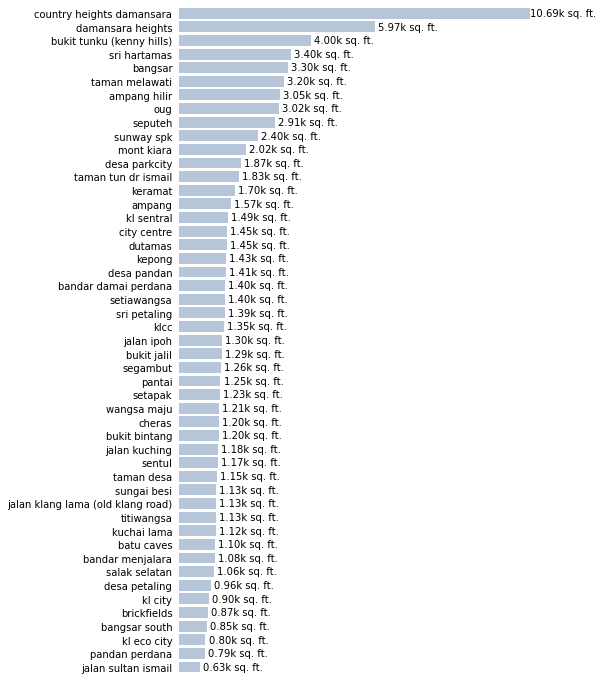

In [7]:
feature_by_neighborhood(feature = 'Size', formatting = "{:.2f}k sq. ft.", factor = 1000)

### Neighborhood and their Number of Rooms

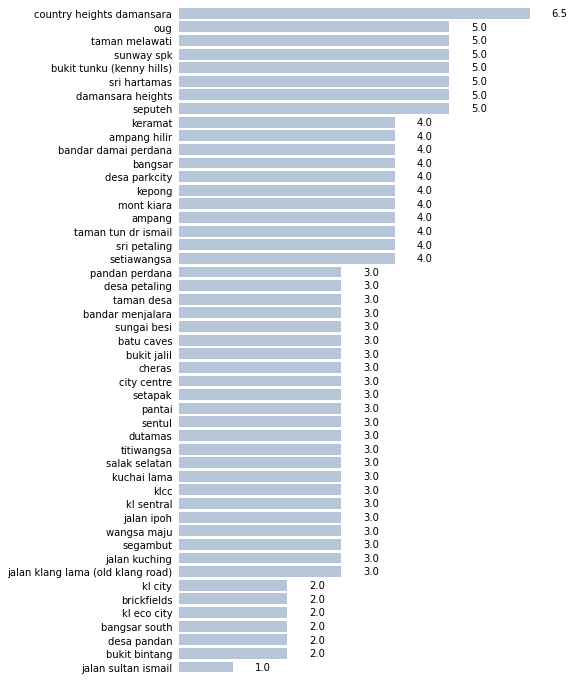

In [8]:
feature_by_neighborhood(feature = 'Rooms', formatting = "{}", factor = 1)

### Number of Properties per Neighborhood

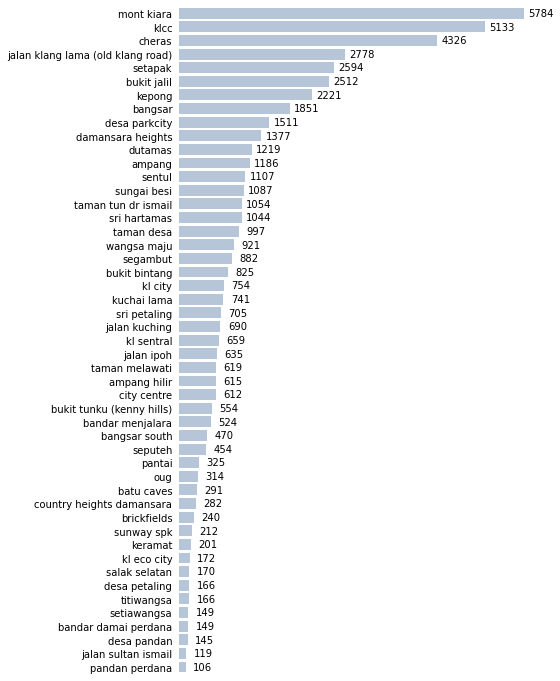

In [9]:
df = kl_data_cleaned.groupby('Location').size().sort_values(ascending=False).reset_index()
df.rename(columns={0:'Count'}, inplace=True)

fig = sns.catplot(
        x = 'Count',
        y = 'Location',
        data = df,
        kind = 'bar',
        height = 10,
        aspect = 0.8,
        color = 'lightsteelblue'
    )

for index, data in df.iterrows():
    fig.ax.text(x = data['Count'] + (0.05 * (df['Count'].max()-df['Count'].min())), 
                y = data.name, 
                s = data['Count'],
                ha ='center', 
                va ='center')
    
fig.despine(left=True, bottom=True)
fig.ax.get_xaxis().set_visible(False)
fig.set_ylabels("")
fig.ax.tick_params(left=False)

### Popularity of each property type per Neighborhood

In [10]:
df = kl_data_cleaned.groupby('Location')['Property Type Supergroup'].value_counts()
df.name = 'Count'

In [11]:
df = df.reset_index().pivot(index = 'Location', columns = 'Property Type Supergroup')
df.columns

MultiIndex([('Count',           'Apartment'),
            ('Count',            'Bungalow'),
            ('Count',       'Cluster House'),
            ('Count',         'Condominium'),
            ('Count',                'Flat'),
            ('Count',    'Residential Land'),
            ('Count', 'Semi-detached House'),
            ('Count',  'Serviced Residence'),
            ('Count',  'Terrace/Link House'),
            ('Count',           'Townhouse')],
           names=[None, 'Property Type Supergroup'])

In [12]:
df.columns = df.columns.droplevel(0)
df.columns

Index(['Apartment', 'Bungalow', 'Cluster House', 'Condominium', 'Flat',
       'Residential Land', 'Semi-detached House', 'Serviced Residence',
       'Terrace/Link House', 'Townhouse'],
      dtype='object', name='Property Type Supergroup')

In [13]:
df = df.fillna(0)

df = df.apply(lambda rowval: rowval / rowval.sum(), axis = 1)
df.head()

Property Type Supergroup,Apartment,Bungalow,Cluster House,Condominium,Flat,Residential Land,Semi-detached House,Serviced Residence,Terrace/Link House,Townhouse
Location,,,,,,,,,,
ampang,0.005902,0.150927,0.000000,0.188027,0.005902,0.021922,0.062395,0.424958,0.121417,0.018550
ampang hilir,0.001626,0.079675,0.000000,0.634146,0.000000,0.017886,0.016260,0.206504,0.030894,0.013008
bandar damai perdana,0.000000,0.020134,0.013423,0.000000,0.000000,0.000000,0.033557,0.000000,0.852349,0.080537
bandar menjalara,0.013359,0.003817,0.000000,0.459924,0.000000,0.000000,0.062977,0.229008,0.223282,0.007634
bangsar,0.001621,0.253377,0.000000,0.463533,0.000540,0.015127,0.018368,0.089141,0.133982,0.024311


Text(237.0612244897959, 0.5, '')

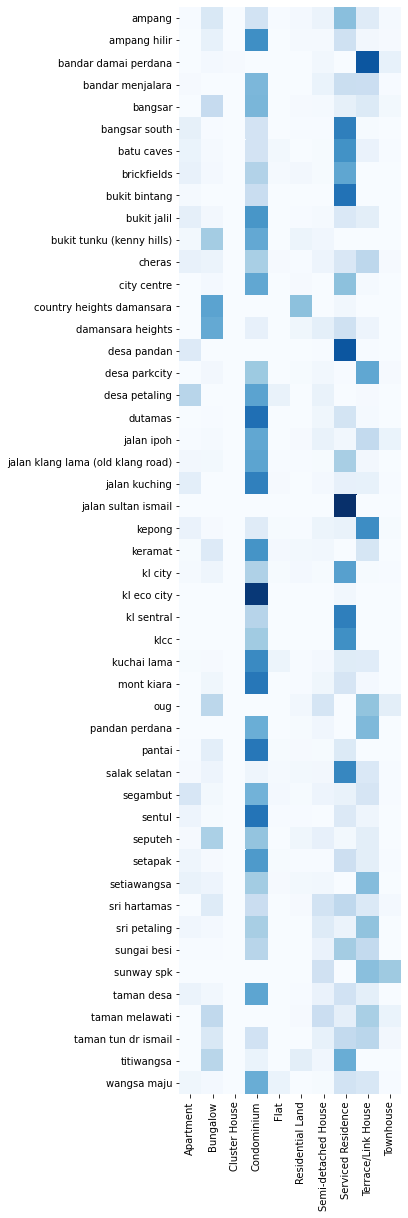

In [25]:
fig, ax = plt.subplots(figsize=(10,20))

fig = sns.heatmap(
        df,
        vmin = 0,
        vmax = 1,
        square = True,
        ax = ax,
        cmap = 'Blues',
        cbar = False)

fig.set_xlabel(None)
fig.set_ylabel(None)